# Labsheet 2

## Name: Aniketh Vijesh
## Roll No: AM.EN.U4AIE22009

In [7]:
import nltk
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec, FastText
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /home/the_architect/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/the_architect/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/the_architect/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

driver = webdriver.Chrome()

wiki_pages = [
    "https://en.wikipedia.org/wiki/Machine_learning",
    "https://en.wikipedia.org/wiki/Deep_learning", 
    "https://en.wikipedia.org/wiki/Natural_language_processing",
    "https://en.wikipedia.org/wiki/Word_embedding",
    "https://en.wikipedia.org/wiki/FastText"
]

documents = []
for page in wiki_pages:
    driver.get(page)

    content = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.ID, "mw-content-text"))
    )

    paragraphs = content.find_elements(By.TAG_NAME, "p")[:2]
    text = " ".join([p.text for p in paragraphs])
    documents.append(text)

driver.quit()


In [9]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", "", text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

processed_docs = [preprocess_text(doc) for doc in documents]

In [10]:
# 3.1 One-Hot Encoding
vectorizer = CountVectorizer(binary=True)
one_hot_vectors = vectorizer.fit_transform(processed_docs).toarray()
print("One-Hot Encoding:\n", one_hot_vectors)

# 3.2 Bag of Words (BoW)
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(processed_docs).toarray()
print("BoW Representation:\n", bow_matrix)

# 3.3 TF-IDF Representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(processed_docs).toarray()
print("TF-IDF Representation:\n", tfidf_matrix)

# 3.4 Word2Vec Representation
tokenized_docs = [doc.split() for doc in processed_docs]
word2vec_model = Word2Vec(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, workers=4)
print("Word2Vec Vector for 'learning':\n", word2vec_model.wv['learning'])
print("Most similar words to 'learning':\n", word2vec_model.wv.most_similar('learning'))

# 3.5 FastText Representation
fasttext_model = FastText(sentences=tokenized_docs, vector_size=100, window=5, min_count=1, workers=4)
print("FastText Vector for 'learning':\n", fasttext_model.wv['learning'])
print("Most similar words to 'learning':\n", fasttext_model.wv.most_similar('learning'))

One-Hot Encoding:
 [[0 0 0 ... 1 1 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]]
BoW Representation:
 [[0 0 0 ... 1 1 0]
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 8]
 [1 0 0 ... 0 0 2]]
TF-IDF Representation:
 [[0.         0.         0.         ... 0.11132149 0.11132149 0.        ]
 [0.         0.         0.08243469 ... 0.         0.         0.        ]
 [0.         0.15404802 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.65704494]
 [0.14902368 0.         0.         ... 0.         0.         0.24046274]]
Word2Vec Vector for 'learning':
 [-6.1332196e-04  2.4089192e-04  5.0952211e-03  9.0374621e-03
 -9.3219411e-03 -7.2960206e-03  6.5866369e-03  9.2127454e-03
 -5.1463507e-03 -3.8266820e-03  7.3705260e-03 -1.6007068e-03
 -4.5180726e-03  6.5398435e-03 -4.9487213e-03 -1.8423485e-03
  2.9625213e-03  8.3171611e-04 -8.2927151e-03 -9.7424267e-03
  7.2368365e-03  5.1049525e-03  6.793067

FastText Vector for 'learning':
 [ 1.04126229e-03  1.20793184e-05 -9.40890866e-04  4.39795316e-04
 -1.87253568e-03 -4.63614357e-04 -4.97156056e-04 -6.55317563e-04
  1.36050570e-03  2.76042760e-04  1.19911027e-04  3.39306338e-04
 -1.12025125e-03  1.29099202e-03  5.34343242e-04 -1.55996403e-03
 -1.60881435e-03 -1.61515072e-03  1.08862469e-05 -2.24982831e-03
 -1.68741518e-03 -2.05214508e-03  1.54210045e-03 -1.04955194e-04
 -4.89125552e-04 -1.11153780e-03  1.86205347e-04 -9.98876756e-04
 -4.96512046e-04 -1.44186046e-03 -1.94982428e-03  1.69132324e-03
  9.70324269e-04 -2.40233698e-04  1.02456006e-05  1.06092903e-03
 -1.05346866e-04  3.57698766e-04 -1.47341273e-03 -1.16781227e-03
 -1.58646377e-03 -1.11150125e-03 -1.04222586e-03  6.25153014e-04
 -1.06774073e-03  1.42938996e-04 -2.72637961e-04  5.62683970e-04
  2.31576327e-04  7.74043903e-04  1.17556332e-03 -5.87532239e-04
 -5.09854406e-04  1.67928112e-03  1.18915050e-03  9.02386091e-04
 -3.27361613e-06  9.21565734e-05 -4.60643321e-04 -6.59356

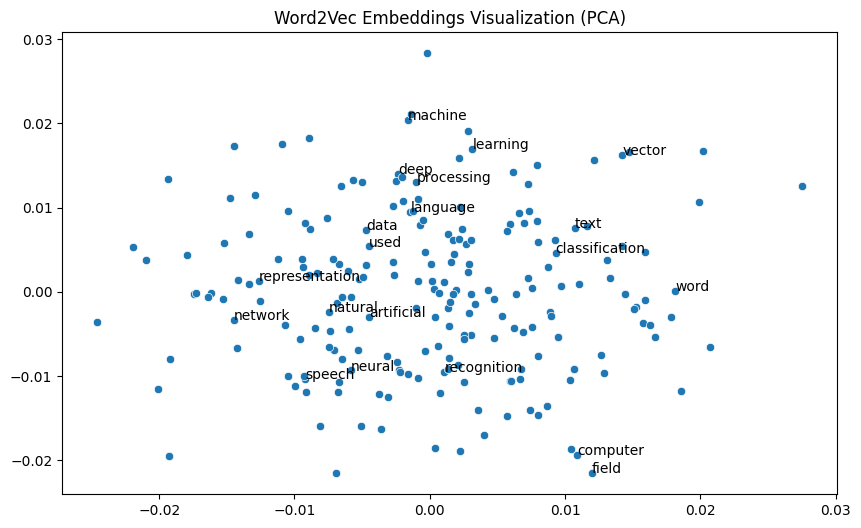

In [11]:
# 4. Visualization using PCA
word_vectors = np.array([word2vec_model.wv[word] for word in word2vec_model.wv.index_to_key])
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=reduced_vectors[:, 0], y=reduced_vectors[:, 1])
for i, word in enumerate(word2vec_model.wv.index_to_key[:20]):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))
plt.title("Word2Vec Embeddings Visualization (PCA)")
plt.show()

In [13]:
# 5. Paragraph Similarity Computation
def get_paragraph_vector(model, doc):
    vectors = [model.wv[word] for word in doc.split() if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

bow_sim = cosine_similarity(bow_matrix)
tfidf_sim = cosine_similarity(tfidf_matrix)
w2v_sim = cosine_similarity([get_paragraph_vector(word2vec_model, doc) for doc in processed_docs])
ft_sim = cosine_similarity([get_paragraph_vector(fasttext_model, doc) for doc in processed_docs])

print("BoW Cosine Similarity:\n", bow_sim)
print("TF-IDF Cosine Similarity:\n", tfidf_sim)
print("Word2Vec Cosine Similarity:\n", w2v_sim)
print("FastText Cosine Similarity:\n", ft_sim)

BoW Cosine Similarity:
 [[1.         0.39477102 0.22298995 0.08145981 0.17680489]
 [0.39477102 1.         0.16138828 0.11201693 0.15538241]
 [0.22298995 0.16138828 1.         0.16826265 0.0489116 ]
 [0.08145981 0.11201693 0.16826265 1.         0.32817107]
 [0.17680489 0.15538241 0.0489116  0.32817107 1.        ]]
TF-IDF Cosine Similarity:
 [[1.         0.27981507 0.13856373 0.04123437 0.08478301]
 [0.27981507 1.         0.09837255 0.064505   0.07770158]
 [0.13856373 0.09837255 1.         0.08692522 0.02787937]
 [0.04123437 0.064505   0.08692522 1.         0.24986705]
 [0.08478301 0.07770158 0.02787937 0.24986705 1.        ]]
Word2Vec Cosine Similarity:
 [[1.0000001  0.49701387 0.31663156 0.15869795 0.22280031]
 [0.49701387 1.         0.25204566 0.25263432 0.25228867]
 [0.31663156 0.25204566 0.99999994 0.3675121  0.0269773 ]
 [0.15869795 0.25263432 0.3675121  0.99999994 0.32390344]
 [0.22280031 0.25228867 0.0269773  0.32390344 1.0000001 ]]
FastText Cosine Similarity:
 [[1.         0.467

- **TF-IDF** is preferable over **BoW** because it considers term importance instead of raw frequency.
- **Word2Vec**: Generates dense vector representations, capturing semantic relationships. The similarity matrix has **higher non-zero values**, showing better generalization (e.g., 0.31, 0.37).
- **FastText**: Similar to Word2Vec but includes subword information (better for rare/morphologically rich words). The similarity scores are slightly lower and more spread out, but it can be more robust for unseen words.

